In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




In [2]:
data = pd.read_csv("nhis.csv")
print(data.head())
print(data.shape)

   Unnamed: 0  YEAR           NHISPID  AGE  SEX  SEXORIEN  MARSTAT  BIRTHYR  \
0     2744230  1986  1986109602890101   60    1       NaN       11      NaN   
1     2744231  1986  1986109602890102   54    2       NaN       11      NaN   
2     2744232  1986  1986109602890103   21    1       NaN       50      NaN   
3     2744233  1986  1986109602890201   46    1       NaN       11      NaN   
4     2744234  1986  1986109602890202   38    2       NaN       11      NaN   

   MORTSTAT  MORTDODY  
0       1.0    2005.0  
1       1.0    2010.0  
2       2.0    9999.0  
3       2.0    9999.0  
4       2.0    9999.0  
(1605246, 10)


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is tr

        Unnamed: 0  YEAR         NHISPID  AGE  SEX  SEXORIEN  MARSTAT  \
829402     3928174  1997  19970003080101   33    2       NaN       11   
829403     3928175  1997  19970003080102   36    1       NaN       11   
829404     3928178  1997  19970003090101   42    1       NaN       11   
829405     3928179  1997  19970003090102   52    2       NaN       11   
829407     3928182  1997  19970003100101   41    1       NaN       11   

        BIRTHYR  MORTSTAT  MORTDODY  Longevity  dead  female  
829402   1963.0       2.0    9999.0       46.0   0.0       1  
829403   1960.0       2.0    9999.0       49.0   0.0       0  
829404   1954.0       1.0    1999.0       45.0   1.0       0  
829405   1944.0       2.0    9999.0       65.0   0.0       1  
829407   1955.0       2.0    9999.0       54.0   0.0       0  
(754219, 13)


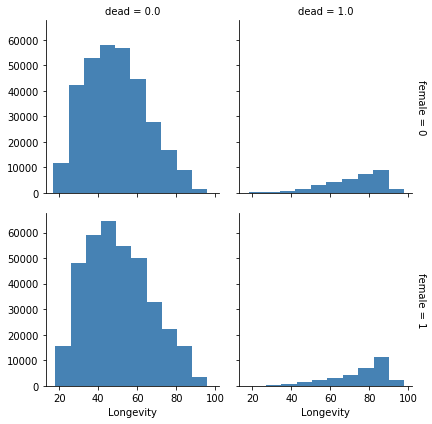

In [3]:

# Dropping cases where birth year is not known
data2 =data[(data["BIRTHYR"]<=2009) & (data["BIRTHYR"].notnull())]

# Calculating time-to-event
data2["Longevity"]= data2["MORTDODY"] - data2["BIRTHYR"]

# Creating a 'status' variable where 1 means dead and 0 means alive as of 2009
data2["dead"]=2-data2['MORTSTAT']

# For people who were alive as of 2009, calculating their longevity as their age in 2009
data2.loc[data2['dead']==0,"Longevity"] = 2009 -data2.loc[data2['dead']==0,"BIRTHYR"] 

# Creating a binary variable where 1 = female and 0 = male
data2["female"] = (data2["SEX"] == 2).astype(int)

print(data2.head())
print(data2.shape)

g = sns.FacetGrid(data2, row="female", col="dead",margin_titles=True)
g.map(plt.hist, "Longevity", color="steelblue", lw=0)
plt.show()

In [4]:
datadf = pd.DataFrame(data2)
list(datadf.columns)

['Unnamed: 0',
 'YEAR',
 'NHISPID',
 'AGE',
 'SEX',
 'SEXORIEN',
 'MARSTAT',
 'BIRTHYR',
 'MORTSTAT',
 'MORTDODY',
 'Longevity',
 'dead',
 'female']

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

sf = sm.SurvfuncRight(data2["Longevity"], data2["dead"])
sf.summary().head()

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/duration/survfunc.py:55: RuntimeWarning: divide by zero encountered in log
  sp = np.log(sp)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/duration/survfunc.py:65: RuntimeWarning: divide by zero encountered in true_divide
  se = d / (n * (n - d)).astype(np.float64)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/duration/survfunc.py:68: RuntimeWarning: invalid value encountered in multiply
  se *= sp


,Surv prob,Surv prob SE,num at risk,num events
Time,,,,
18.0,0.999997,0.000002,754217,2.0
19.0,0.999981,0.000005,753439,12.0
20.0,0.999940,0.000009,751911,31.0
21.0,0.999879,0.000013,749414,46.0
22.0,0.999825,0.000015,746169,40.0


In [6]:
groups = data2.groupby("female")

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/duration/survfunc.py:55: RuntimeWarning: divide by zero encountered in log
  sp = np.log(sp)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/duration/survfunc.py:65: RuntimeWarning: divide by zero encountered in true_divide
  se = d / (n * (n - d)).astype(np.float64)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/duration/survfunc.py:68: RuntimeWarning: invalid value encountered in multiply
  se *= sp


(0.85, 1)

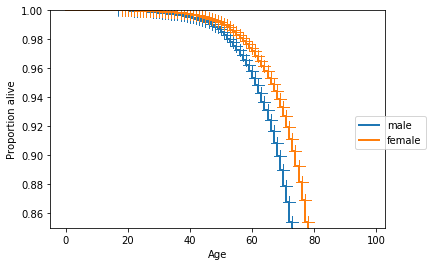

In [7]:
# Code for this plot modified from the statsmodels documentation at http://www.statsmodels.org/dev/duration.html

groups = data2.groupby("female")
ax = plt.axes()
sexes = ["male","female"]
# Fitting a survival function for each group
for group in groups:
    sf = sm.SurvfuncRight(group[1]["Longevity"], group[1]["dead"])
    sf.plot(ax)
li = ax.get_lines()
plt.figlegend((li[0], li[2]), sexes, "center right")
ax.set_ylabel("Proportion alive")
ax.set_xlabel("Age")
ax.set_autoscaley_on(False)
ax.set_ylim([.85,1])



In [8]:
mod = smf.phreg("Longevity ~  female", # The model
                data2, # The data
                status=data2['dead'].values # Whether values are right-censored
                ) 
rslt = mod.fit()
print(rslt.summary())

                       Results: PHReg
Model:                  PH Reg        Sample size:     754217
Dependent variable:     Longevity     Num. events:     67383 
Ties:                   Breslow                              
-------------------------------------------------------------
        log HR log HR SE   HR      t     P>|t|  [0.025 0.975]
-------------------------------------------------------------
female -0.4460    0.0078 0.6402 -57.5296 0.0000 0.6306 0.6500
Confidence intervals are for the hazard ratios


64% less likely to die than men

        Unnamed: 0  YEAR         NHISPID  AGE  SEX  SEXORIEN  MARSTAT  \
829402     3928174  1997  19970003080101   33    2       NaN       11   
829403     3928175  1997  19970003080102   36    1       NaN       11   
829404     3928178  1997  19970003090101   42    1       NaN       11   
829405     3928179  1997  19970003090102   52    2       NaN       11   
829407     3928182  1997  19970003100101   41    1       NaN       11   

        BIRTHYR  MORTSTAT  MORTDODY  Longevity  dead  female  predicted  
829402   1963.0       2.0    9999.0       46.0   0.0       1   0.994803  
829403   1960.0       2.0    9999.0       49.0   0.0       0   0.988401  
829404   1954.0       1.0    1999.0       45.0   1.0       0   0.992777  
829405   1944.0       2.0    9999.0       65.0   0.0       1   0.956459  
829407   1955.0       2.0    9999.0       54.0   0.0       0   0.978739  


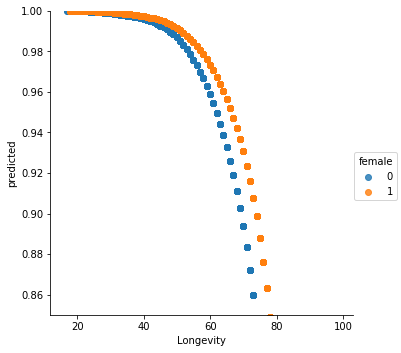

In [9]:
data3=data2[(data2['Longevity'].notnull()) & (data2['female'].notnull()) & (data2['dead'].notnull())]
data3["predicted"] = rslt.predict(pred_type='surv').predicted_values

print(data3.head())

sns.lmplot(x="Longevity", y="predicted", hue="female", data=data3,fit_reg=False,lowess=True)
plt.ylim(.85, 1)
plt.show()


In [10]:

# Dropping cases where birth year is not known
data2 =data[(data["BIRTHYR"]<=2009) & (data["BIRTHYR"].notnull())]

# Calculating time-to-event
data2["Longevity"]= data2["MORTDODY"] - data2["BIRTHYR"]

# Creating a 'status' variable where 1 means dead and 0 means alive as of 2009
data2["dead"]=2-data2['MORTSTAT']

# For people who were alive as of 2009, calculating their longevity as their age in 2009
data2.loc[data2['dead']==0,"Longevity"] = 2009 -data2.loc[data2['dead']==0,"BIRTHYR"] 


data3 = pd.DataFrame(data2[data2['MARSTAT'].isin(range(10,51))])
data3.head()


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is tr

,Unnamed: 0,YEAR,NHISPID,AGE,SEX,SEXORIEN,MARSTAT,BIRTHYR,MORTSTAT,MORTDODY,Longevity,dead
829402,3928174,1997,19970003080101,33,2,NaN,11,1963.0,2.0,9999.0,46.0,0.0
829403,3928175,1997,19970003080102,36,1,NaN,11,1960.0,2.0,9999.0,49.0,0.0
829404,3928178,1997,19970003090101,42,1,NaN,11,1954.0,1.0,1999.0,45.0,1.0
829405,3928179,1997,19970003090102,52,2,NaN,11,1944.0,2.0,9999.0,65.0,0.0
829407,3928182,1997,19970003100101,41,1,NaN,11,1955.0,2.0,9999.0,54.0,0.0


In [11]:
 #Creating a binary variable where 1 = married
data3['married'] = np.where(data3['MARSTAT']<12,1,0)

In [12]:
data3['married'].value_counts()

1    431709
0    319788
Name: married, dtype: int64

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

sf = sm.SurvfuncRight(data3["Longevity"], data3["dead"])
sf.summary().head()

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/duration/survfunc.py:55: RuntimeWarning: divide by zero encountered in log
  sp = np.log(sp)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/duration/survfunc.py:65: RuntimeWarning: divide by zero encountered in true_divide
  se = d / (n * (n - d)).astype(np.float64)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/duration/survfunc.py:68: RuntimeWarning: invalid value encountered in multiply
  se *= sp


,Surv prob,Surv prob SE,num at risk,num events
Time,,,,
18.0,0.999997,0.000002,751495,2.0
19.0,0.999981,0.000005,750717,12.0
20.0,0.999940,0.000009,749189,31.0
21.0,0.999878,0.000013,746692,46.0
22.0,0.999825,0.000015,743450,40.0


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/duration/survfunc.py:55: RuntimeWarning: divide by zero encountered in log
  sp = np.log(sp)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/duration/survfunc.py:65: RuntimeWarning: divide by zero encountered in true_divide
  se = d / (n * (n - d)).astype(np.float64)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/duration/survfunc.py:68: RuntimeWarning: invalid value encountered in multiply
  se *= sp


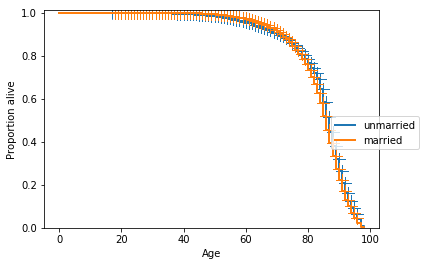

In [17]:
# Code for this plot modified from the statsmodels documentation at http://www.statsmodels.org/dev/duration.html

groups = data3.groupby("married")

ax = plt.axes()
status = ["unmarried","married"]
# Fitting a survival function for each group
for group in groups:
    sf = sm.SurvfuncRight(group[1]["Longevity"], group[1]["dead"])
    sf.plot(ax)
li = ax.get_lines()
plt.figlegend((li[0], li[2]), status, "center right")
ax.set_ylabel("Proportion alive")
ax.set_xlabel("Age")
ax.set_autoscaley_on(False)




In [16]:
mod = smf.phreg("Longevity ~  married", # The model
                data3, # The data
                status=data3['dead'].values # Whether values are right-censored
                ) 
rslt = mod.fit()
print(rslt.summary())

                      Results: PHReg
Model:                  PH Reg       Sample size:    751495
Dependent variable:     Longevity    Num. events:    67184 
Ties:                   Breslow                            
-----------------------------------------------------------
        log HR log HR SE   HR     t    P>|t|  [0.025 0.975]
-----------------------------------------------------------
married 0.0307    0.0079 1.0311 3.8790 0.0001 1.0153 1.0472
Confidence intervals are for the hazard ratios


According to the model, married people are very slightly more likely to die at any age.

        Unnamed: 0  YEAR         NHISPID  AGE  SEX  SEXORIEN  MARSTAT  \
829402     3928174  1997  19970003080101   33    2       NaN       11   
829403     3928175  1997  19970003080102   36    1       NaN       11   
829404     3928178  1997  19970003090101   42    1       NaN       11   
829405     3928179  1997  19970003090102   52    2       NaN       11   
829407     3928182  1997  19970003100101   41    1       NaN       11   

        BIRTHYR  MORTSTAT  MORTDODY  Longevity  dead  married  
829402   1963.0       2.0    9999.0       46.0   0.0        1  
829403   1960.0       2.0    9999.0       49.0   0.0        1  
829404   1954.0       1.0    1999.0       45.0   1.0        1  
829405   1944.0       2.0    9999.0       65.0   0.0        1  
829407   1955.0       2.0    9999.0       54.0   0.0        1  


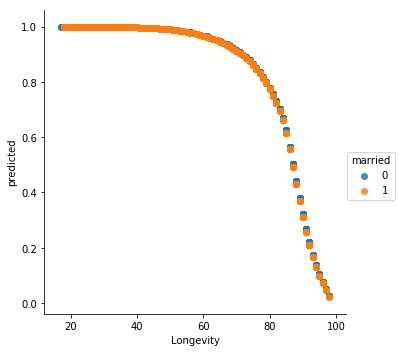

In [18]:
data4=data3[(data3['Longevity'].notnull()) & (data3['married'].notnull()) & (data3['dead'].notnull())]
data4["predicted"] = rslt.predict(pred_type='surv').predicted_values

print(data3.head())

sns.lmplot(x="Longevity", y="predicted", hue="married", data=data4,fit_reg=False,lowess=True)
plt.show()


This graph doesn't capture the fact that married 55-75 year-olds do better. It's only the very old that do better unmarried.